In [0]:
from PIL import Image
from torchvision import transforms as tfs

In [4]:
!pip install Pillow

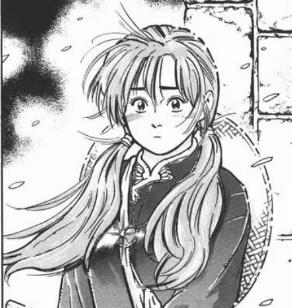

In [6]:
im = Image.open('1.jpg')
im

before scale, shape:(292, 308)
after scale, shape:(200, 100)


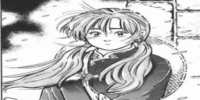

In [7]:
print('before scale, shape:{}'.format(im.size))
new_im = tfs.Resize((100,200))(im)
print('after scale, shape:{}'.format(new_im.size))
new_im

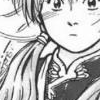

In [8]:
random_im1 = tfs.RandomCrop(100)(im)
random_im1

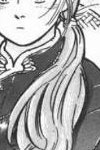

In [9]:
random_im2 = tfs.RandomCrop((150,100))(im)
random_im2

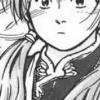

In [10]:
center_im = tfs.CenterCrop(100)(im)
center_im

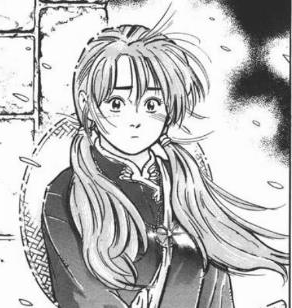

In [12]:
h_filp = tfs.RandomHorizontalFlip()(im)
h_filp

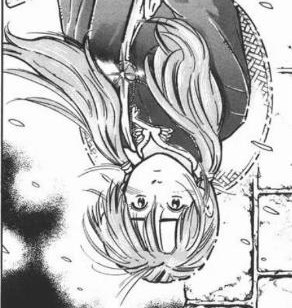

In [13]:
v_flip = tfs.RandomVerticalFlip()(im)
v_flip

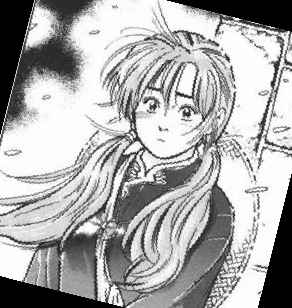

In [14]:
rot_im = tfs.RandomRotation(45)(im)
rot_im

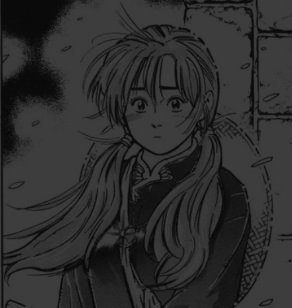

In [16]:
bright_im = tfs.ColorJitter(brightness=1)(im)
bright_im

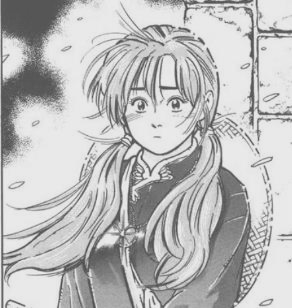

In [17]:
contrast_im = tfs.ColorJitter(contrast=1)(im)
contrast_im

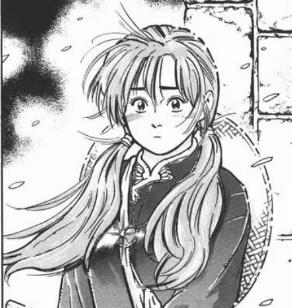

In [18]:
color_im = tfs.ColorJitter(hue=0.5)(im)
color_im

In [0]:
im_aug = tfs.Compose([
    tfs.Resize(120),
    tfs.RandomHorizontalFlip(),
    tfs.RandomCrop(96),
    tfs.ColorJitter(brightness=0.5, contrast=0.5, hue=0.5)
])

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

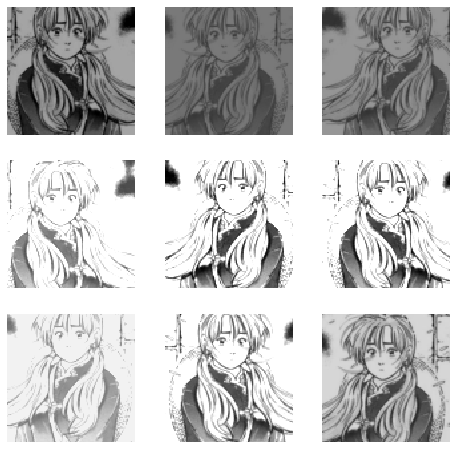

In [21]:
nrows = 3
ncols = 3
figsize = (8, 8)
_, figs = plt.subplots(nrows, ncols, figsize=figsize)
for i in range(nrows):
    for j in range(ncols):
        figs[i][j].imshow(im_aug(im))
        figs[i][j].axes.get_xaxis().set_visible(False)
        figs[i][j].axes.get_yaxis().set_visible(False)
plt.show()

In [0]:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.datasets import CIFAR10
from Myutils import train, resnet
from torchvision import transforms as tfs

In [0]:
def train_tf(x):
    im_aug = tfs.Compose([
        tfs.Resize(120),
        tfs.RandomHorizontalFlip(),
        tfs.RandomCrop(96),
        tfs.ColorJitter(brightness=0.5, contrast=0.5, hue=0.5),
        tfs.ToTensor(),
        tfs.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
    ])
    x = im_aug(x)
    return x

def test_tf(x):
    im_aug = tfs.Compose([
        tfs.Resize(96),
        tfs.ToTensor(),
        tfs.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
    ])
    x = im_aug(x)
    return x

train_set = CIFAR10('./data', train=True, transform=train_tf)
train_data = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_set = CIFAR10('./data', train=False, transform=test_tf)
test_data = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=False)

net = resnet(3, 10)
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [24]:
train(net, train_data, test_data, 10, optimizer, criterion)

/content/Myutils.py:70: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  im = Variable(im.cuda(), volatile=True)
/content/Myutils.py:71: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label.cuda(), volatile=True)


Epoch 0. Train Loss: 1.853236, Train Acc: 0.318934, Valid Loss: 1.902503, Valid Acc: 0.323477, Time 00:03:34
Epoch 1. Train Loss: 1.416879, Train Acc: 0.491748, Valid Loss: 2.193674, Valid Acc: 0.408426, Time 00:03:49
Epoch 2. Train Loss: 1.196632, Train Acc: 0.579324, Valid Loss: 1.426660, Valid Acc: 0.535700, Time 00:03:47
Epoch 3. Train Loss: 1.051251, Train Acc: 0.630974, Valid Loss: 1.094099, Valid Acc: 0.637658, Time 00:03:48
Epoch 4. Train Loss: 0.947386, Train Acc: 0.669158, Valid Loss: 1.735490, Valid Acc: 0.497923, Time 00:03:49
Epoch 5. Train Loss: 0.877691, Train Acc: 0.693794, Valid Loss: 0.956252, Valid Acc: 0.674644, Time 00:03:49
Epoch 6. Train Loss: 0.816109, Train Acc: 0.717391, Valid Loss: 1.025848, Valid Acc: 0.653382, Time 00:03:48
Epoch 7. Train Loss: 0.764960, Train Acc: 0.734115, Valid Loss: 1.241375, Valid Acc: 0.597112, Time 00:03:49
Epoch 8. Train Loss: 0.730734, Train Acc: 0.746004, Valid Loss: 1.650174, Valid Acc: 0.528085, Time 00:03:49
Epoch 9. Train Loss

In [0]:
def data_tf(x):
    im_aug = tfs.Compose([
        tfs.Resize(96),
        tfs.ToTensor(),
        tfs.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
    ])
    x = im_aug(x)
    return x

train_set = CIFAR10('./data', train=True, transform=data_tf)
train_data = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_set = CIFAR10('./data', train=False, transform=data_tf)
test_data = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=False)

net = resnet(3, 10)
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [26]:
train(net, train_data, test_data, 10, optimizer, criterion)

/content/Myutils.py:70: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  im = Variable(im.cuda(), volatile=True)
/content/Myutils.py:71: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  label = Variable(label.cuda(), volatile=True)


Epoch 0. Train Loss: 1.429298, Train Acc: 0.478621, Valid Loss: 1.656053, Valid Acc: 0.456191, Time 00:02:17
Epoch 1. Train Loss: 0.992849, Train Acc: 0.647179, Valid Loss: 1.263090, Valid Acc: 0.567642, Time 00:02:31
Epoch 2. Train Loss: 0.773463, Train Acc: 0.729660, Valid Loss: 1.574710, Valid Acc: 0.507021, Time 00:02:31
Epoch 3. Train Loss: 0.612804, Train Acc: 0.788263, Valid Loss: 0.873814, Valid Acc: 0.700356, Time 00:02:31
Epoch 4. Train Loss: 0.483994, Train Acc: 0.833999, Valid Loss: 1.127692, Valid Acc: 0.650020, Time 00:02:30
Epoch 5. Train Loss: 0.372841, Train Acc: 0.871703, Valid Loss: 1.275593, Valid Acc: 0.627868, Time 00:02:30
Epoch 6. Train Loss: 0.283128, Train Acc: 0.904672, Valid Loss: 0.752413, Valid Acc: 0.763845, Time 00:02:30
Epoch 7. Train Loss: 0.200163, Train Acc: 0.933084, Valid Loss: 2.760365, Valid Acc: 0.453619, Time 00:02:30
Epoch 8. Train Loss: 0.150566, Train Acc: 0.949968, Valid Loss: 1.481180, Valid Acc: 0.640328, Time 00:02:30
Epoch 9. Train Loss